In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv('/home/adarsh/Jupyter_Notebook/ASL/archive/sign_mnist_train/sign_mnist_train.csv')

In [47]:
test = pd.read_csv('/home/adarsh/Jupyter_Notebook/ASL/archive/sign_mnist_test/sign_mnist_test.csv')

In [11]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
labels = train['label'].values

In [13]:
labels

array([ 3,  6,  2, ..., 18, 17, 23])

In [14]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

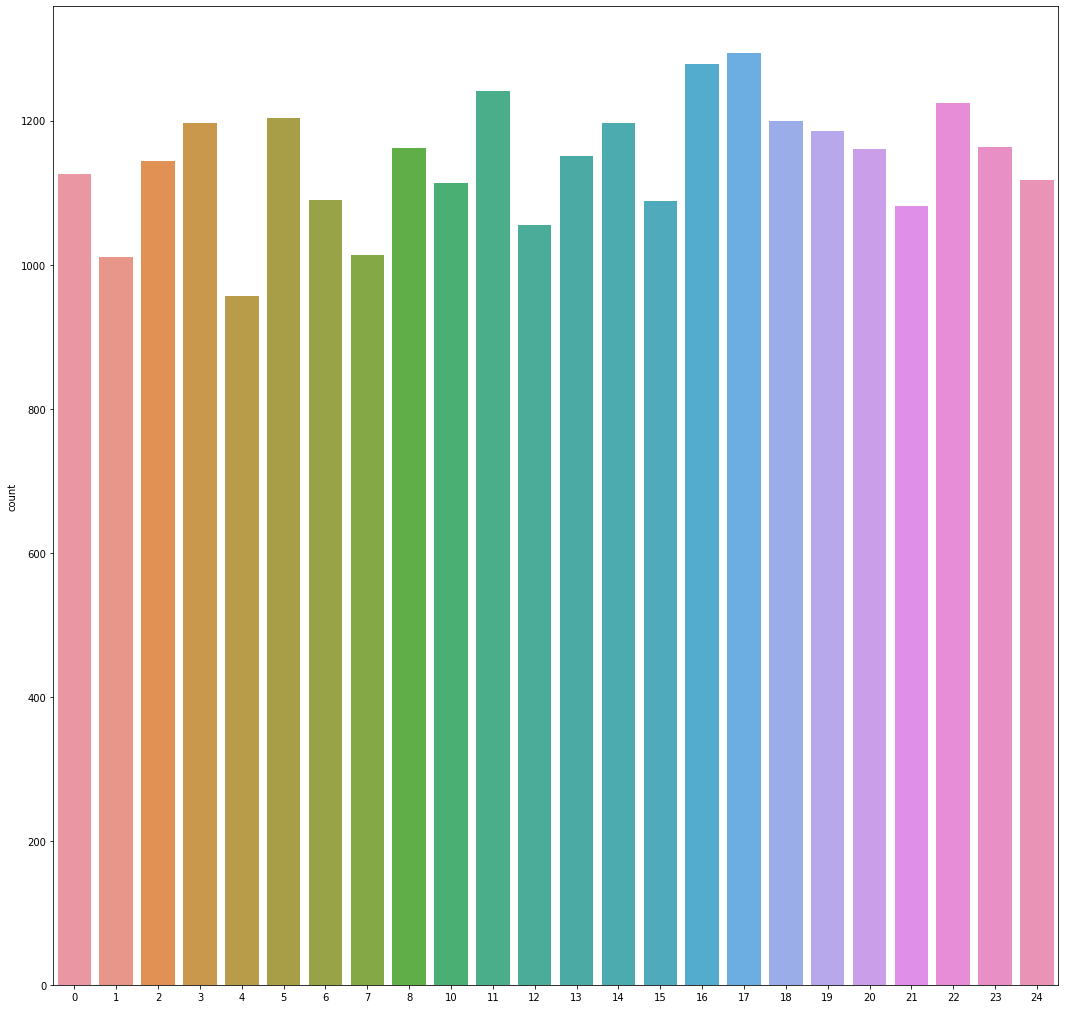

In [15]:
plt.figure(figsize = (18,18))
sns.countplot(x = labels)

In [16]:
train.drop('label', axis = 1, inplace = True)

In [17]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [18]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [19]:
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [20]:
len(labels[0])

24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


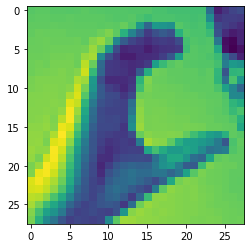

In [21]:
#checking an image
index  = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [22]:
# check some random images
import cv2

for i in range (10):
    rand = np.random.randint(len(images))
    input_image = images[rand]
    
    sample = input_image.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow('sample', sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [23]:
# split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 42)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 64
num_classes = 24
epochs = 10

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
x_train.shape

(19218, 784)

In [28]:
x_train.shape[0]

19218

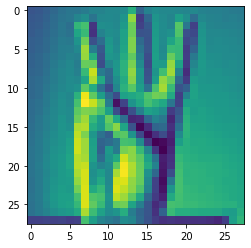

In [29]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [31]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

 

In [32]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy'])

In [33]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size)

Epoch 1/10
301/301 [==============================] - 14s 45ms/step - loss: 2.3187 - accuracy: 0.2720 - val_loss: 1.1664 - val_accuracy: 0.6528
Epoch 2/10
301/301 [==============================] - 14s 48ms/step - loss: 0.9105 - accuracy: 0.6966 - val_loss: 0.5151 - val_accuracy: 0.8465
Epoch 3/10
301/301 [==============================] - 15s 49ms/step - loss: 0.4795 - accuracy: 0.8368 - val_loss: 0.3232 - val_accuracy: 0.8892
Epoch 4/10
301/301 [==============================] - 14s 46ms/step - loss: 0.2915 - accuracy: 0.9004 - val_loss: 0.1398 - val_accuracy: 0.9649
Epoch 5/10
301/301 [==============================] - 15s 49ms/step - loss: 0.1766 - accuracy: 0.9433 - val_loss: 0.0856 - val_accuracy: 0.9789
Epoch 6/10
301/301 [==============================] - 15s 50ms/step - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.0646 - val_accuracy: 0.9858
Epoch 7/10
301/301 [==============================] - 15s 49ms/step - loss: 0.0801 - accuracy: 0.9764 - val_loss: 0.0259 - val_accuracy:

In [34]:
model.save('modelmnist10.h5')
print('model svaed')

model svaed


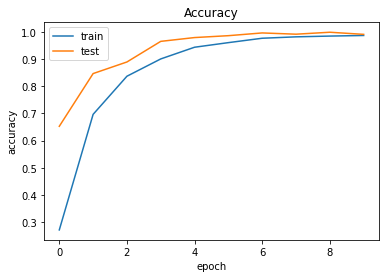

In [37]:
# check training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

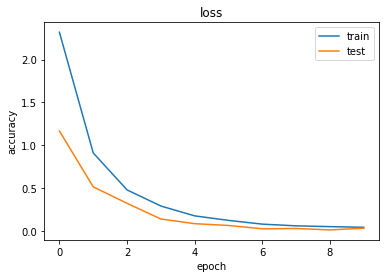

In [39]:
# check training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [48]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for  i in test_images])
test_images = np.array(i.flatten() for i in test_images)

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

IndexError: tuple index out of range